In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('/Users/mh/Downloads/UNI/Regression_Lab/files/ch06/BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [7]:
data.shape

(506, 14)

In [3]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [15]:
# Fit the linear regression model
model = LinearRegression()

# Split the data into training and testing sets (80:20 ratio)
X = data.drop(columns=['medv'])  # Features
y = data['medv']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% for training and 20 % for testing

# Fit the regression model using the training data
model.fit(X_train, y_train)

#  Evaluate the model's performance using the testing data
predictions = model.predict(X_test)

#  Calculate R-squared and MSE
r_squared = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print("Squared R (R-squared):", r_squared)
print("Mean Squared Error (MSE):", mse)

# Apply linear regression on each variable separately after preprocessing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Standardize the features

for column in X.columns:
    X_temp = X[[column]]  # Selecting a single variable on by one
    X_train_temp, X_test_temp, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=42)
    
    # Fit linear regression model
    model.fit(X_train_temp, y_train)
    predictions_temp = model.predict(X_test_temp)
    
    # Evaluate the model
    r_squared_temp = r2_score(y_test, predictions_temp)
    mse_temp = mean_squared_error(y_test, predictions_temp)
    print(f"\nVariable: {column}")
    print("Squared R (R-squared):", r_squared_temp)
    print("Mean Squared Error (MSE):", mse_temp)



Squared R (R-squared): 0.7200277678580305
Mean Squared Error (MSE): 20.687720473048568

Variable: crim
Squared R (R-squared): 0.10622155522713972
Mean Squared Error (MSE): 66.04311609345922

Variable: zn
Squared R (R-squared): 0.17561201261224368
Mean Squared Error (MSE): 60.91571336892015

Variable: indus
Squared R (R-squared): 0.3457053624493176
Mean Squared Error (MSE): 48.34716809272471

Variable: chas
Squared R (R-squared): 0.03981236949300648
Mean Squared Error (MSE): 70.95022656223549

Variable: nox
Squared R (R-squared): 0.24398494027085138
Mean Squared Error (MSE): 55.86349799561847

Variable: rm
Squared R (R-squared): 0.4512483559980376
Mean Squared Error (MSE): 40.548380578263284

Variable: age
Squared R (R-squared): 0.20326621857758875
Mean Squared Error (MSE): 58.872287567231844

Variable: dis
Squared R (R-squared): 0.09864992401762651
Mean Squared Error (MSE): 66.6025993993179

Variable: rad
Squared R (R-squared): 0.21623019244721509
Mean Squared Error (MSE): 57.914353040

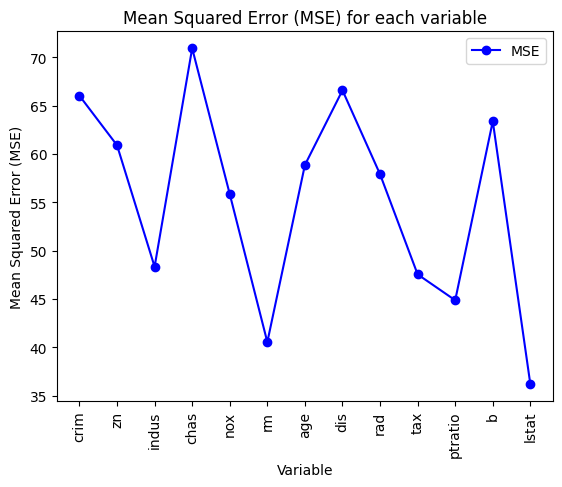

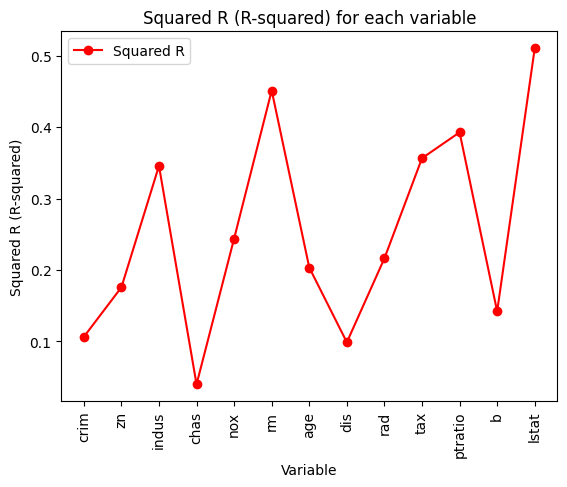

In [19]:

mse_values = []
r_squared_values = []

# Apply linear regression on each variable separately and collect MSE and Squared R values
for column in X.columns:
    X_temp = X[[column]]  # Selecting a single variable
    X_train_temp, X_test_temp, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=42)
    model.fit(X_train_temp, y_train)
    predictions = model.predict(X_test_temp)
    r_squared = r2_score(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    r_squared_values.append(r_squared)
    mse_values.append(mse)


plt.plot(X.columns, mse_values, marker='o', linestyle='-', color='b', label='MSE')
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Mean Squared Error (MSE) for each variable')
plt.legend()
plt.show()

# Plot Squared R values
plt.plot(X.columns, r_squared_values, marker='o', linestyle='-', color='r', label='Squared R')
plt.xticks(rotation=90)
plt.xlabel('Variable')
plt.ylabel('Squared R (R-squared)')
plt.title('Squared R (R-squared) for each variable')
plt.legend()
plt.show()
